In [45]:
import pandas as pd
import yfinance as yf

# Load S&P 500 data
sp500_data = yf.download('^GSPC', start='2010-01-01', end=pd.to_datetime('today'))

# Initialize variables
position = None
initial_investment = None
portfolio_value = None
positions = []
transaction_fee_percent = 0.005  # 0.5% transaction fee when buying

# Initialize the 'Action' column with 'Hold' for all rows
sp500_data['Action'] = 'Hold'

# Implement the 200-day moving average trading strategy
for i in range(200, len(sp500_data)):
    if sp500_data['Close'][i] > sp500_data['Close'][i - 1] and position != 'long':
        # Buy when the close price crosses above the previous day's close price
        position = 'long'
        positions.append(('buy', sp500_data.index[i], sp500_data['Close'][i]))
        if initial_investment is None:
            initial_investment = sp500_data['Close'][i]
            portfolio_value = initial_investment
        # Apply transaction fee when buying
        portfolio_value -= sp500_data['Close'][i] * transaction_fee_percent
        sp500_data.at[sp500_data.index[i], 'Action'] = 'Buy'
    elif sp500_data['Close'][i] < sp500_data['Close'][i - 1] and position == 'long':
        # Sell when the close price crosses below the previous day's close price
        position = None
        positions.append(('sell', sp500_data.index[i], sp500_data['Close'][i]))
        if initial_investment is not None:
            portfolio_value = sp500_data['Close'][i]
        sp500_data.at[sp500_data.index[i], 'Action'] = 'Sell'

# Calculate the percentage profit, considering transaction fees
percentage_profit = ((portfolio_value - initial_investment) / initial_investment) * 100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Final Portfolio Value: ${portfolio_value:.2f}")
print(f"Percentage Profit (including transaction fees): {percentage_profit:.2f}%")

# Determine the action to take today (latest row in the DataFrame)
today_action = sp500_data.iloc[-1]['Action']
print(f"Today's Action: {today_action}")


[*********************100%%**********************]  1 of 1 completed
Initial Investment: $1178.17
Final Portfolio Value: $4485.08
Percentage Profit (including transaction fees): 280.68%
Today's Action: Buy


In [43]:
# Filter the DataFrame to select data for August 2023
sp500_august_2023 = sp500_data['2023-07':]

# Print the filtered data
sp500_august_2023

,Open,High,Low,Close,Adj Close,Volume,Action
Date,,,,,,,
2023-07-03,4450.479980,4456.459961,4442.290039,4455.589844,4455.589844,2034280000,Hold
2023-07-05,4442.040039,4454.060059,4436.609863,4446.819824,4446.819824,3482620000,Sell
2023-07-06,4422.620117,4422.620117,4385.049805,4411.589844,4411.589844,3682020000,Hold
2023-07-07,4404.540039,4440.390137,4397.399902,4398.950195,4398.950195,3630480000,Hold
2023-07-10,4394.229980,4412.600098,4389.919922,4409.529785,4409.529785,3429600000,Buy
2023-07-11,4415.549805,4443.640137,4408.459961,4439.259766,4439.259766,3624220000,Hold
2023-07-12,4467.689941,4488.339844,4463.229980,4472.160156,4472.160156,3920290000,Hold
2023-07-13,4491.500000,4517.379883,4489.359863,4510.040039,4510.040039,3839530000,Hold
2023-07-14,4514.609863,4527.759766,4499.560059,4505.419922,4505.419922,3647450000,Sell


In [46]:
#check wheher yahoo fiance has the data on today or yesterday

import yfinance as yf
from datetime import datetime, timedelta

# Calculate the date for yesterday
yesterday = datetime.now() - timedelta(days=3)

# Load S&P 500 data for yesterday
sp500_data_yesterday = yf.download('^GSPC', start=yesterday, end=yesterday)

# Check if data is available for yesterday
if not sp500_data_yesterday.empty:
    # Extract the closing price
    closing_price_yesterday = sp500_data_yesterday['Close'].values[0]
    print(f"Closing price of S&P 500 for yesterday: {closing_price_yesterday:.2f}")
else:
    print("No data available for yesterday.")

[*********************100%%**********************]  1 of 1 completed
Closing price of S&P 500 for yesterday: 4515.77


In [49]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume,Action
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,Hold
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,Hold
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,Hold
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,Hold
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,Hold
...,...,...,...,...,...,...,...
2023-08-28,4426.029785,4439.560059,4414.979980,4433.310059,4433.310059,2957230000,Hold
2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,4497.629883,3354820000,Hold
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000,Hold


# problem with this code is that it can tell us to buy, hold, or sale on for the 4 previous day. 
there is 2 days to operate when buy and 2 days to operate when sale. Therefore, it is difficult to do day trade.
It is better to trade with longer strategy.

it is also possible to take into account this delay by consider 250 days average and then back checking 
whether oour stragy works

[*********************100%%**********************]  1 of 1 completed
Initial Investment: $10000.00
Final Portfolio Value: $39857.10
Percentage Profit (buy and hold): 298.57%


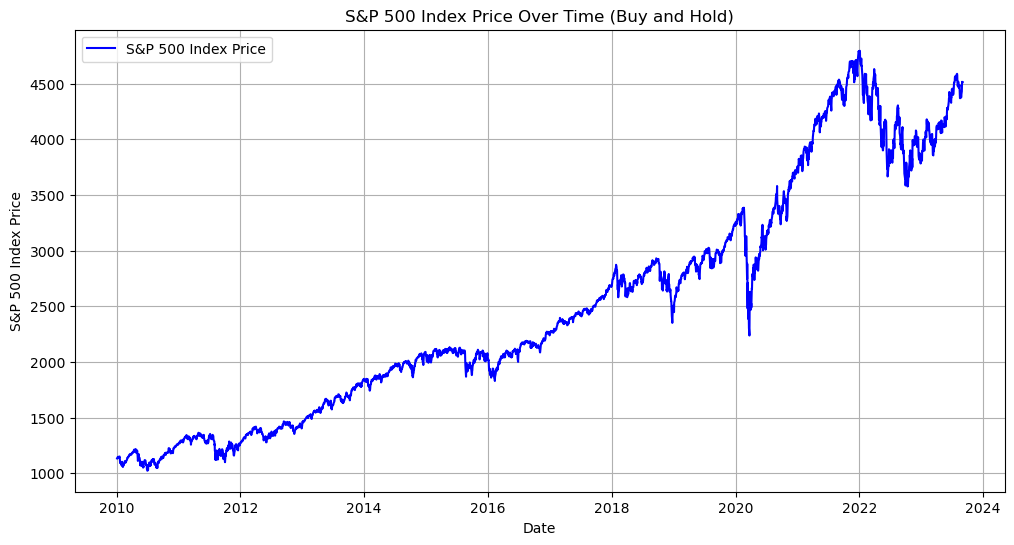

In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Load S&P 500 data
sp500_data = yf.download('^GSPC', start='2010-01-01', end=pd.to_datetime('today'))

# Define the initial investment
initial_investment = 10000  # You can change this value to your initial investment

# Calculate the percentage profit
final_portfolio_value = sp500_data['Adj Close'][-1] * (initial_investment / sp500_data['Adj Close'][0])
percentage_profit = ((final_portfolio_value - initial_investment) / initial_investment) * 100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Percentage Profit (buy and hold): {percentage_profit:.2f}%")

# Plot the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['Adj Close'], label='S&P 500 Index Price', color='blue')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index Price')
plt.title('S&P 500 Index Price Over Time (Buy and Hold)')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2023-08-28,4426.029785,4439.560059,4414.979980,4433.310059,4433.310059,2957230000
2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,4497.629883,3354820000
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000
